<a href="https://colab.research.google.com/github/jpcosta90/datasciencecoursera/blob/master/Trabalho_Reg_Linear.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### **TRABALHO FINAL - ANÁLISE DE DADOS**

Em um estudo deseja-se analisar aspectos relacionados com o preço de venda de casas em uma cidade americana. O objetivo é predizer o preço de venda de residências em função de características da casa e sua vizinhança.

O conjunto de dados no arquivo dados_trabalho.xlsx, em anexo, apresenta as seguintes informações sobre 11 características de 522 casas vendidas durante o último ano nesta cidade.



| Código | Nome                        | Descrição                                  |
|-------|----------------------------|--------------------------------------------|
| ID    | Número de Identificação     | 1-522                                      |
| x1    | Preço de venda              | Preço de venda da casa (em dólares)        |
| x2    | Tamanho da casa             | Área da casa (em pés quadrados)            |
| x3    | Número de quartos           | Número de quartos na casa                  |
| x4    | Número de banheiros         | Número de banheiros na casa                |
| x5    | Ar condicionado             | Presença de ar condicionado na casa        |
| x6    | Tamanho da garagem          | Número de carros que podem ser guardados   |
|       |                            | na garagem                                 |
| x7    | Piscina                    | Presença ou ausência de piscina            |
|       |                            | (1 – sim 0 – não)                          |
| x8    | Ano de construção           | Ano em que a casa foi originalmente        |
|       |                            | construída                                 |
| x9    | Qualidade da construção     | Índice de qualidade da construção:         |
|       |                            | 1. Alta qualidade                         |
|       |                            | 2. Média qualidade                        |
|       |                            | 3. Baixa qualidade                        |
| x10   | Tamanho do terreno          | Tamanho do terreno (em pés quadrados)      |
| x11   | Proximidade da “highway"    | Proximidade de “highway" (1 – sim 0 – não) |

***

In [5]:
df = pd.read_excel('/content/DADOS_TRABALHO_2023_1_af1ab3af385c6daaec7c784896557598.xlsx')

In [1]:
import pandas as pd

In [34]:
df.columns

Index(['ID', 'X1', 'X2', 'X3', 'X4', 'X5', 'X6', 'X7', 'X8', 'X9', 'X10',
       'X11'],
      dtype='object')

In [35]:
# Criando a coluna "Idade da Casa"
df['X12'] = 2023 - df['X8']

In [36]:
df

,ID,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,X11,X12
0,1,360000,3032,4,4,1,2,0,1972,2,22221,0,51
1,2,340000,2058,4,2,1,2,0,1976,2,22912,0,47
2,3,250000,1780,4,3,1,2,0,1980,2,21345,0,43
3,4,205500,1638,4,2,1,2,0,1963,2,17342,0,60
4,5,275500,2196,4,3,1,2,0,1968,2,21786,0,55
...,...,...,...,...,...,...,...,...,...,...,...,...,...
517,518,137000,1655,2,1,0,1,0,1935,3,54651,0,88
518,519,185000,1944,3,2,1,2,0,1939,3,17999,0,84
519,520,133500,1922,3,1,0,2,0,1950,3,14805,0,73
520,521,124000,1480,3,2,1,2,0,1953,3,28351,0,70


---
#### Veriricação de valores faltantes


In [37]:
import pandas as pd

# Verificando a quantidade de valores nulos em cada coluna
valores_ausentes = df.isnull().sum()

# Exibindo a quantidade de valores nulos em cada coluna
print(valores_ausentes)

ID     0
X1     0
X2     0
X3     0
X4     0
X5     0
X6     0
X7     0
X8     0
X9     0
X10    0
X11    0
X12    0
dtype: int64


In [39]:
# Dicionário com as descrições das variáveis
descricao_variaveis = {
    "ID": "Número de Identificação",
    "X1": "Preço de venda (em dólares)",
    "X2": "Área da casa (em pés quadrados)",
    "X3": "Número de quartos na casa",
    "X4": "Número de banheiros na casa",
    "X5": "Presença de ar condicionado na casa",
    "X6": "Número de carros que podem ser guardados na garagem",
    "X7": "Presença ou ausência de piscina",
    "X8": "Ano de construção da casa",
    "X9": "Índice de qualidade da construção",
    "X10": "Tamanho do terreno (em pés quadrados)",
    "X11": "Proximidade de 'highway'",
    "X12": "Idade da Casa"
}

In [40]:
# Verificando o tipo de dado de cada coluna, excluindo o ID
tipos_dados = df.drop('ID', axis=1).dtypes

# Exibindo o tipo de dado de cada coluna
print("Tipos de Dados:")
print(tipos_dados)
print()

Tipos de Dados:
X1     int64
X2     int64
X3     int64
X4     int64
X5     int64
X6     int64
X7     int64
X8     int64
X9     int64
X10    int64
X11    int64
X12    int64
dtype: object



Análise descritiva para a variável: Preço de venda (em dólares)
count       522.000000
mean     277894.147510
std      137923.397269
min       84000.000000
25%      180000.000000
50%      229900.000000
75%      335000.000000
max      920000.000000
Name: X1, dtype: float64



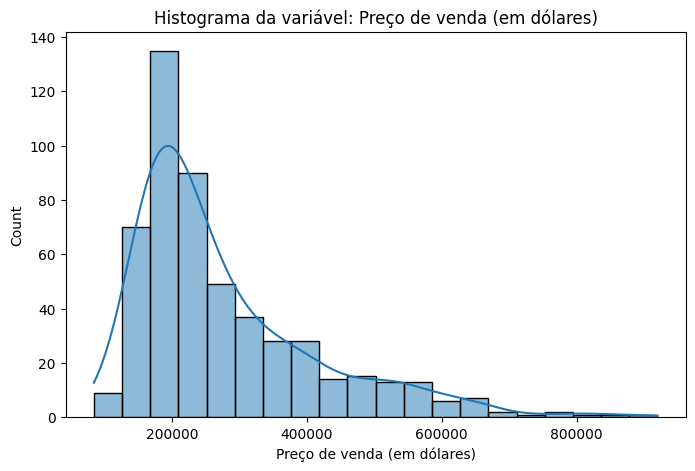

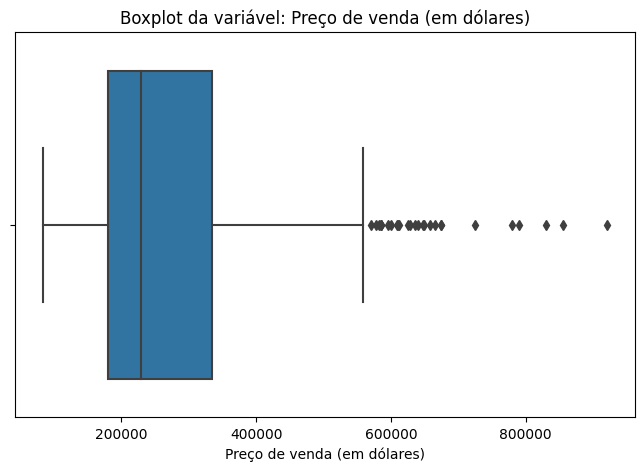

Análise descritiva para a variável: Área da casa (em pés quadrados)
count     522.000000
mean     2260.626437
std       711.065933
min       980.000000
25%      1701.250000
50%      2061.000000
75%      2636.250000
max      5032.000000
Name: X2, dtype: float64



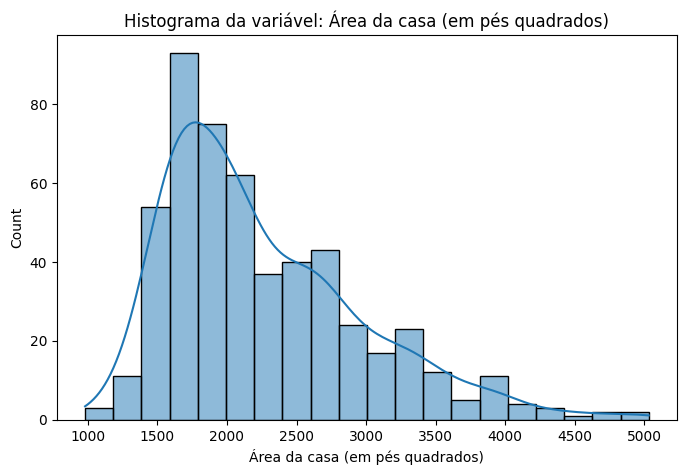

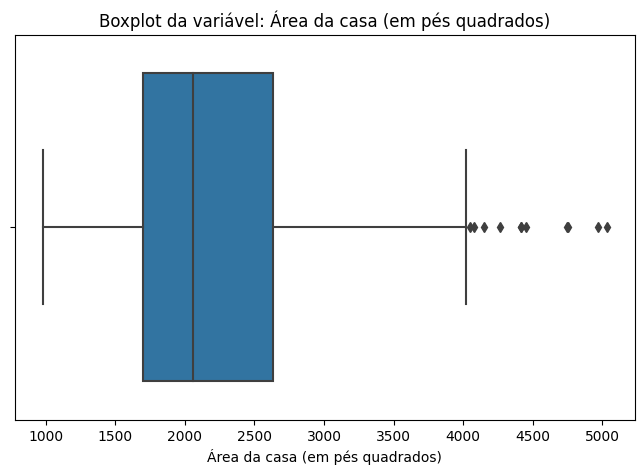

Análise descritiva para a variável: Tamanho do terreno (em pés quadrados)
count      522.000000
mean     24369.704981
std      11684.075549
min       4560.000000
25%      17204.750000
50%      22200.000000
75%      26786.750000
max      86830.000000
Name: X10, dtype: float64



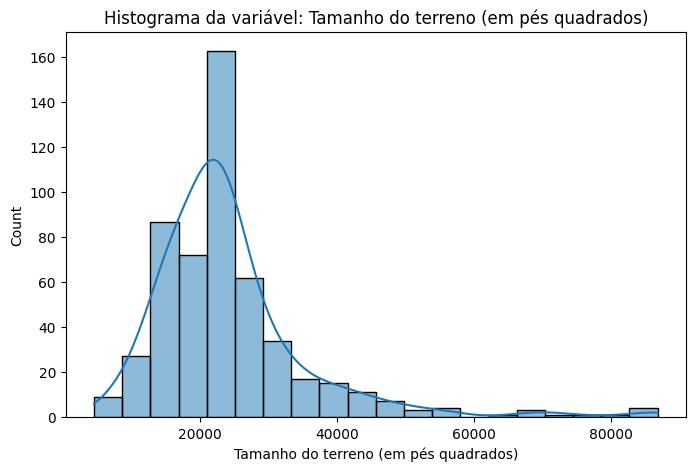

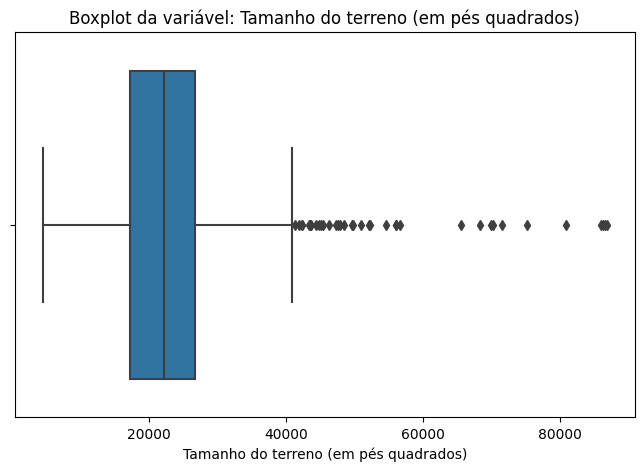

Análise descritiva para a variável: Idade da Casa
count    522.000000
mean      56.095785
std       17.637924
min       25.000000
25%       42.000000
50%       57.000000
75%       67.000000
max      138.000000
Name: X12, dtype: float64



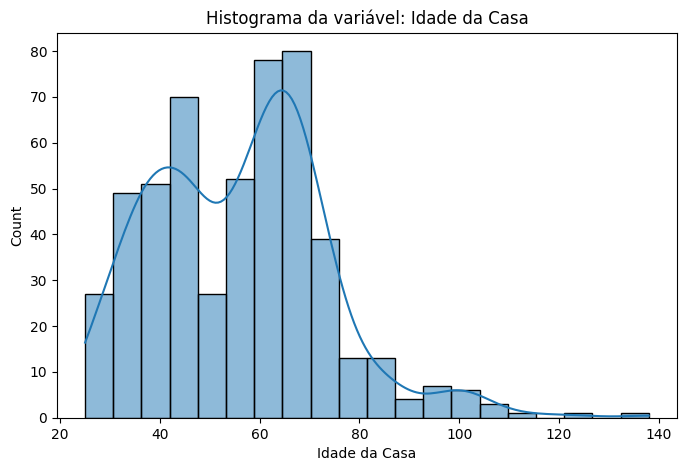

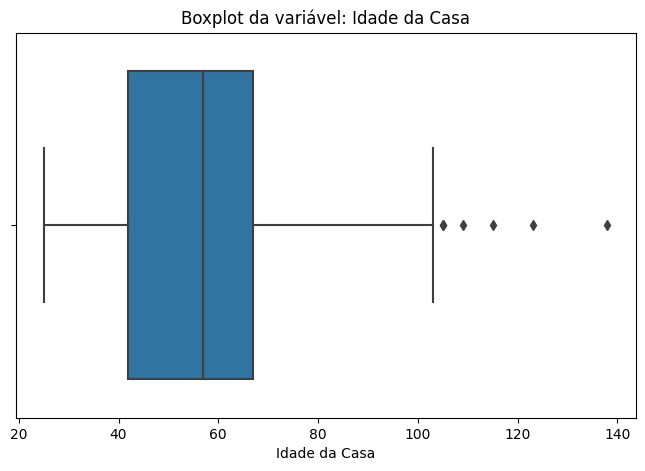

In [41]:
# Análise descritiva univariada para variáveis numéricas (exceto ID e as não discretas)
colunas_numericas = df.select_dtypes(include=['int64', 'float64']).columns

for coluna in colunas_numericas:
    if coluna != 'ID' and coluna not in ['X3', 'X4', 'X6', 'X9', 'X5', 'X7', 'X11', 'X8']:  # Excluindo o ID e as não discretas da análise descritiva
        descricao_var = descricao_variaveis[coluna]
        print(f"Análise descritiva para a variável: {descricao_var}")
        print(df[coluna].describe())
        print()
        plt.figure(figsize=(8, 5))
        sns.histplot(df[coluna], kde=True, bins=20)
        plt.xlabel(descricao_var)  # Adicionando a descrição no eixo x
        plt.title(f"Histograma da variável: {descricao_var}")
        plt.show()

        plt.figure(figsize=(8, 5))
        sns.boxplot(data=df, x=coluna)
        plt.xlabel(descricao_var)  # Adicionando a descrição no eixo x
        plt.title(f"Boxplot da variável: {descricao_var}")
        plt.show()

Análise descritiva para a variável: Número de quartos na casa
3    202
4    179
2     64
5     52
6     12
1      9
7      3
0      1
Name: X3, dtype: int64


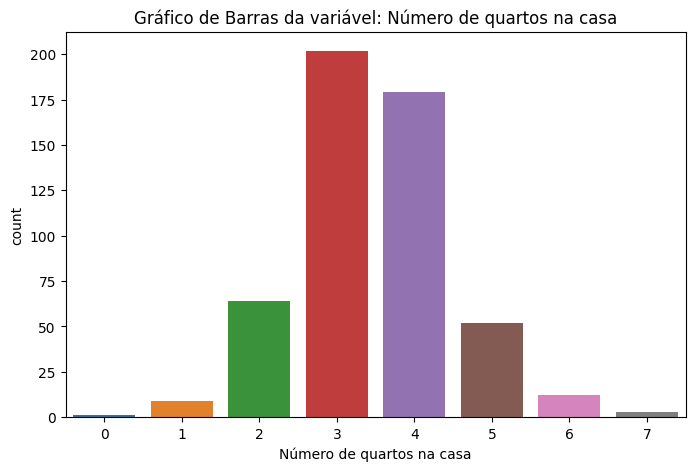

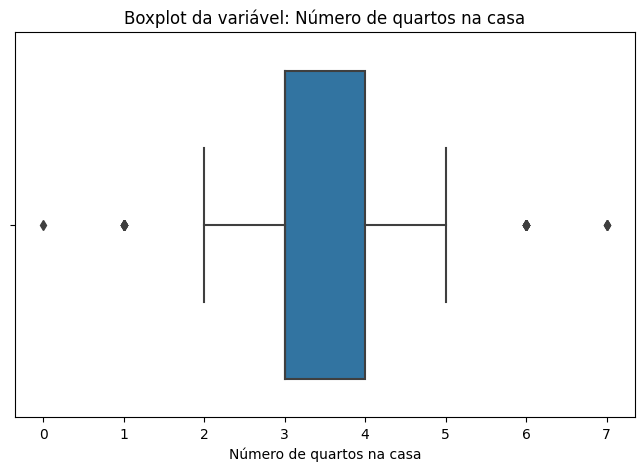

Análise descritiva para a variável: Número de banheiros na casa
3    175
2    171
4     84
1     71
5     17
7      2
6      1
0      1
Name: X4, dtype: int64


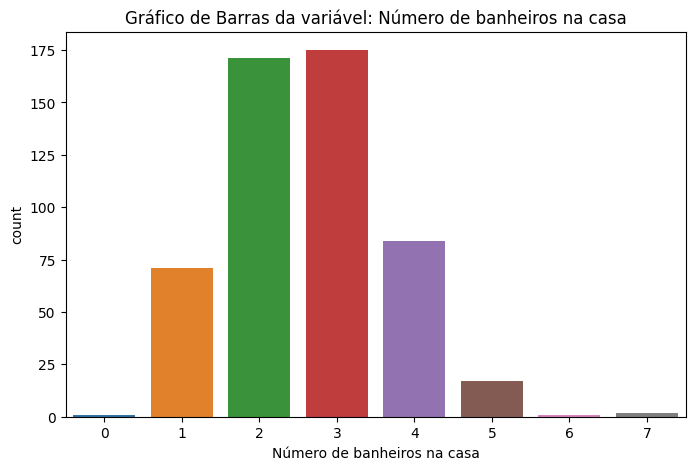

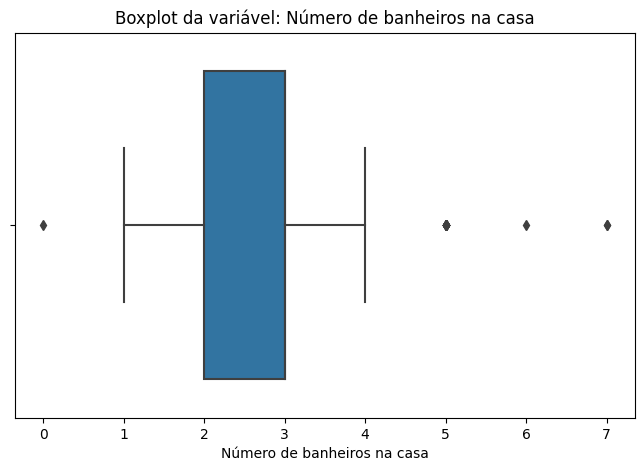

Análise descritiva para a variável: Número de carros que podem ser guardados na garagem
2    353
3    106
1     52
0      7
4      2
5      1
7      1
Name: X6, dtype: int64


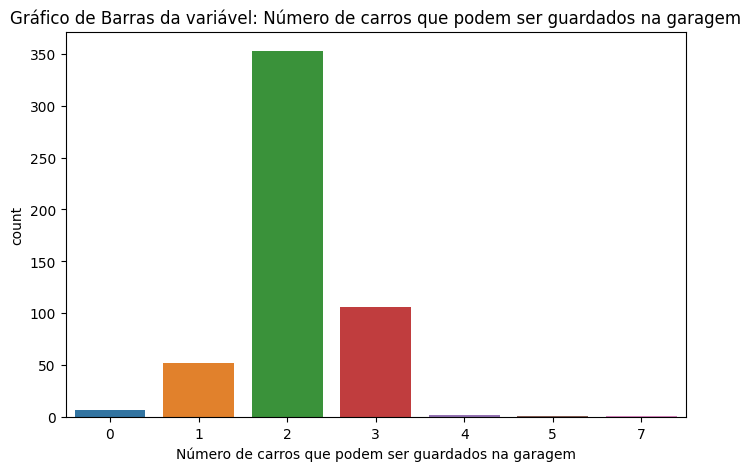

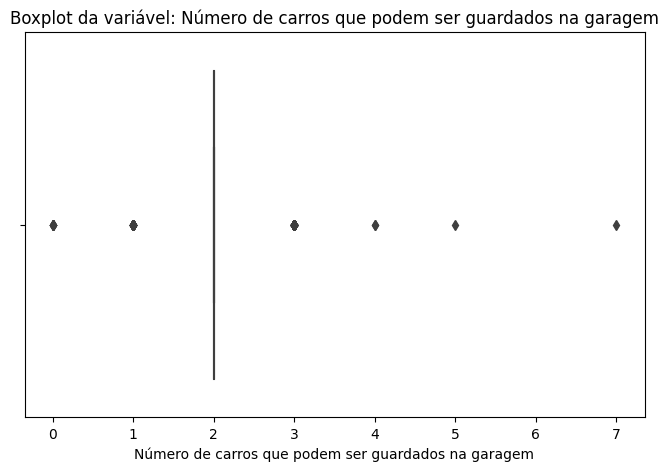

Análise descritiva para a variável: Índice de qualidade da construção
2    290
3    164
1     68
Name: X9, dtype: int64


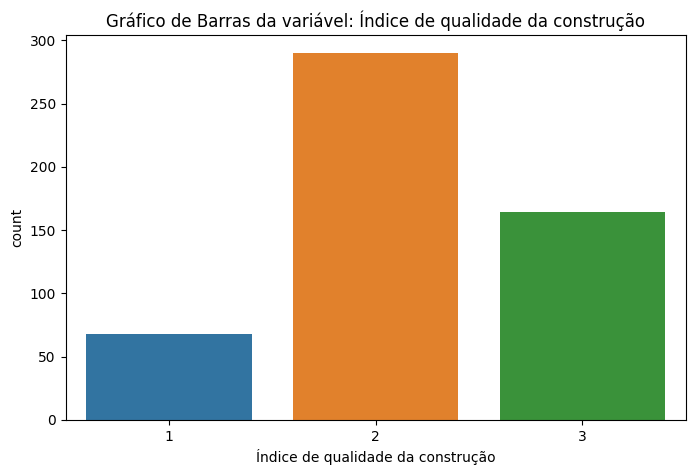

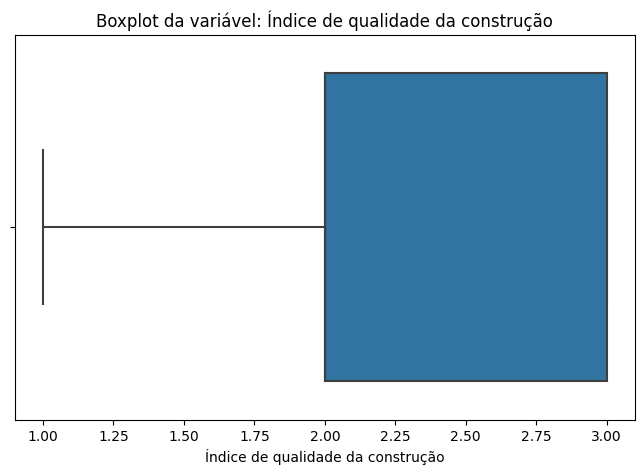

In [42]:
# Análise descritiva univariada para variáveis não discretas usando gráficos de barras
colunas_nao_discretas = ['X3', 'X4', 'X6', 'X9']

for coluna in colunas_nao_discretas:
    descricao_var = descricao_variaveis[coluna]
    print(f"Análise descritiva para a variável: {descricao_var}")
    print(df[coluna].value_counts())
    plt.figure(figsize=(8, 5))
    sns.countplot(data=df, x=coluna)
    plt.xlabel(descricao_var)  # Adicionando a descrição no eixo x
    plt.title(f"Gráfico de Barras da variável: {descricao_var}")
    plt.show()

    plt.figure(figsize=(8, 5))
    sns.boxplot(data=df, x=coluna)
    plt.xlabel(descricao_var)  # Adicionando a descrição no eixo x
    plt.title(f"Boxplot da variável: {descricao_var}")
    plt.show()

Análise descritiva para a variável: Presença de ar condicionado na casa
1    434
0     88
Name: X5, dtype: int64
Análise descritiva para a variável: Presença ou ausência de piscina
0    486
1     36
Name: X7, dtype: int64
Análise descritiva para a variável: Proximidade de 'highway'
0    511
1     11
Name: X11, dtype: int64


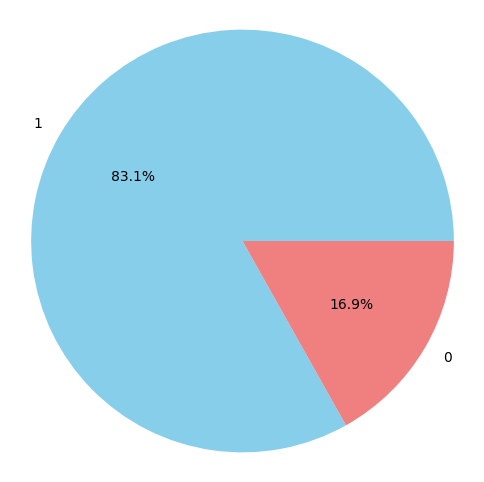

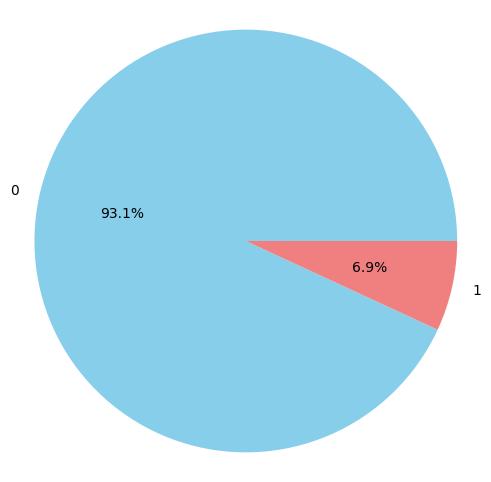

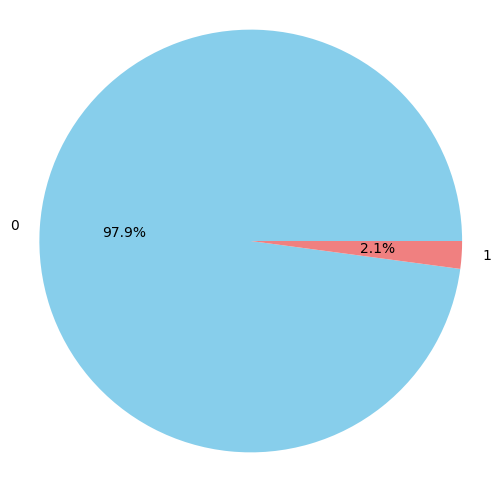

In [43]:
# Análise descritiva univariada para variáveis "dummy" usando gráficos de pizza
colunas_dummy = ['X5', 'X7', 'X11']

for coluna in colunas_dummy:
    descricao_var = descricao_variaveis[coluna]
    print(f"Análise descritiva para a variável: {descricao_var}")
    print(df[coluna].value_counts())
    plt.figure(figsize=(6, 6))
    df[coluna].value_counts().plot(kind='pie', autopct='%1.1f%%', colors=['skyblue', 'lightcoral'])
    plt.axis('equal')
    plt.xlabel("")  # Removendo o rótulo do eixo x (não é necessário
    plt.ylabel("")  # Removendo o rótulo do eixo x (não é necessário

In [52]:
# Criando uma lista para armazenar as tabelas descritivas
tabelas_descritivas = []

colunas_nao_discretas = ['X5', 'X7', 'X11']
# Calculando as medidas descritivas para as variáveis numéricas (exceto ID)
colunas_numericas = [x for x in df.columns if x not in colunas_nao_discretas + ['X8', 'ID']]
colunas_numericas

['X1', 'X2', 'X3', 'X4', 'X6', 'X9', 'X10', 'X12']

In [53]:
# Criando uma lista para armazenar as tabelas descritivas
tabelas_descritivas = []

for coluna in colunas_numericas:
    if coluna != 'ID':
        descricao_var = descricao_variaveis[coluna]
        tabela_descritiva = df[coluna].describe().reset_index()
        tabela_descritiva.columns = ['Medida Descritiva', descricao_var]
        tabelas_descritivas.append(tabela_descritiva)

for coluna in colunas_nao_discretas:
    descricao_var = descricao_variaveis[coluna]
    tabela_descritiva = df[coluna].value_counts().reset_index()
    tabela_descritiva.columns = [descricao_var, 'Contagem']
    tabelas_descritivas.append(tabela_descritiva)

# Exibindo as tabelas descritivas
for tabela_descritiva in tabelas_descritivas:
    print(tabela_descritiva)
    print()

  Medida Descritiva  Preço de venda (em dólares)
0             count                   522.000000
1              mean                277894.147510
2               std                137923.397269
3               min                 84000.000000
4               25%                180000.000000
5               50%                229900.000000
6               75%                335000.000000
7               max                920000.000000

  Medida Descritiva  Área da casa (em pés quadrados)
0             count                       522.000000
1              mean                      2260.626437
2               std                       711.065933
3               min                       980.000000
4               25%                      1701.250000
5               50%                      2061.000000
6               75%                      2636.250000
7               max                      5032.000000

  Medida Descritiva  Número de quartos na casa
0             count              

In [80]:
df[['X1', 'X2', 'X3', 'X4', 'X6', 'X10', 'X12']].columns

Index(['X1', 'X2', 'X3', 'X4', 'X6', 'X10', 'X12'], dtype='object')

In [84]:
colunas = ['X1', 'X2', 'X3', 'X4', 'X6', 'X10', 'X12']

nomes = []

for i in colunas:
  nomes.append(descricao_variaveis[i])

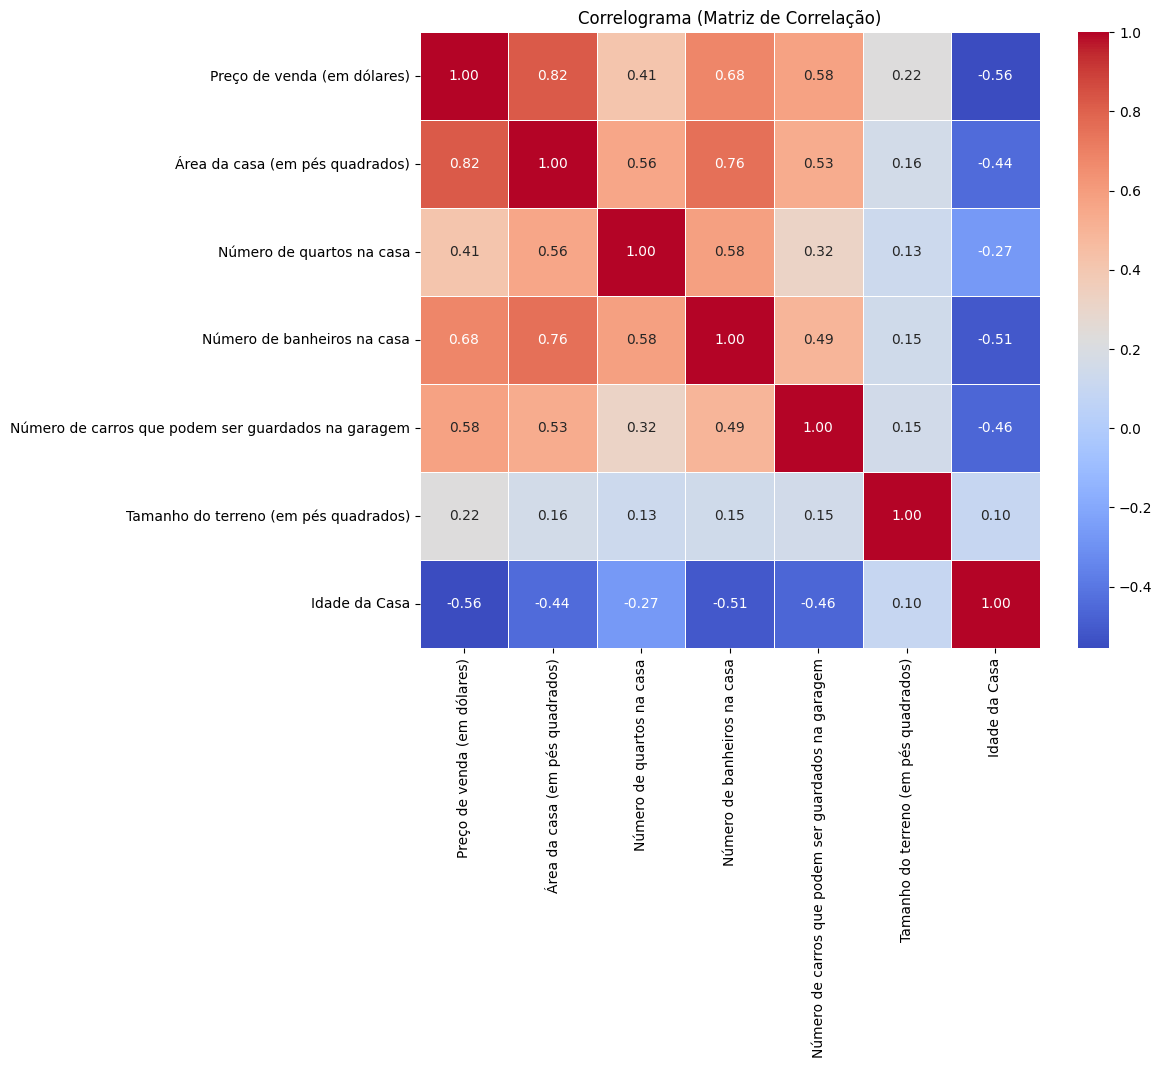

In [87]:
# Supondo que você já tenha importado os dados e o DataFrame seja chamado de 'df'
# Se você deu outro nome para o DataFrame, substitua 'df' pelo nome correto.

# Calculando a matriz de correlação
correlation_tb = df[['X1', 'X2', 'X3', 'X4', 'X6', 'X10', 'X12']]

correlation_tb.columns = nomes

correlation_matrix = correlation_tb.corr()

# Criando o correlograma
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Correlograma (Matriz de Correlação)")
plt.show()

In [ ]:
# Dicionário com as descrições das variáveis
descricao_variaveis = {
    "ID": "Número de Identificação",
    "X1": "Preço de venda (em dólares)",
    "X2": "Área da casa (em pés quadrados)",
    "X3": "Número de quartos na casa",
    "X4": "Número de banheiros na casa",
    "X5": "Presença de ar condicionado na casa",
    "X6": "Número de carros que podem ser guardados na garagem",
    "X7": "Presença ou ausência de piscina",
    "X8": "Ano de construção da casa",
    "X9": "Índice de qualidade da construção",
    "X10": "Tamanho do terreno (em pés quadrados)",
    "X11": "Proximidade de 'highway'",
    "X12": "Idade da Casa"
}

In [ ]:
nomes = df[['X1', 'X5', 'X7','X9','X11']].columns

In [103]:
qualitativas = df[['X1', 'X5', 'X7','X9','X11']]

In [ ]:
qualitativas['X9'] = qualitativas['X9'].map({1: '1 - Alta qualidade', 2: '2 - Média qualidade', 3: '3 - Baixa qualidade'})

# Atualizando os labels para o eixo x dos boxplots
for coluna in ['X5', 'X7', 'X11']:
    qualitativas[coluna] = qualitativas[coluna].map({0: 'Não', 1: 'Sim'})

In [107]:
qualitativas = qualitativas.sort_values('X9')

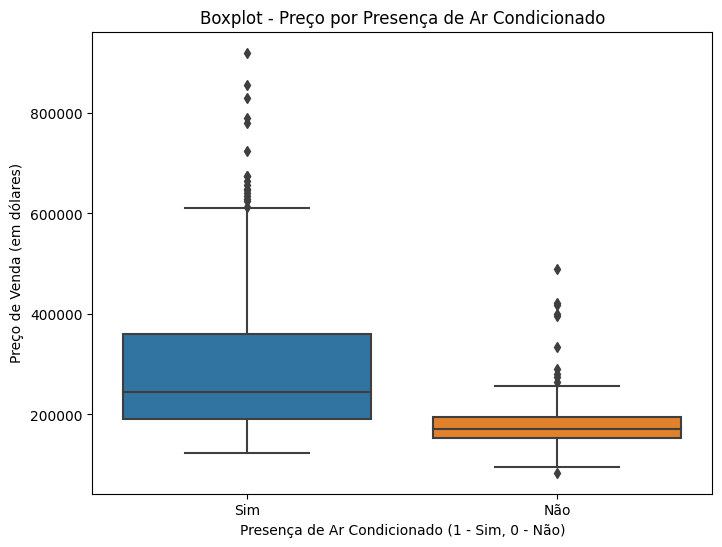

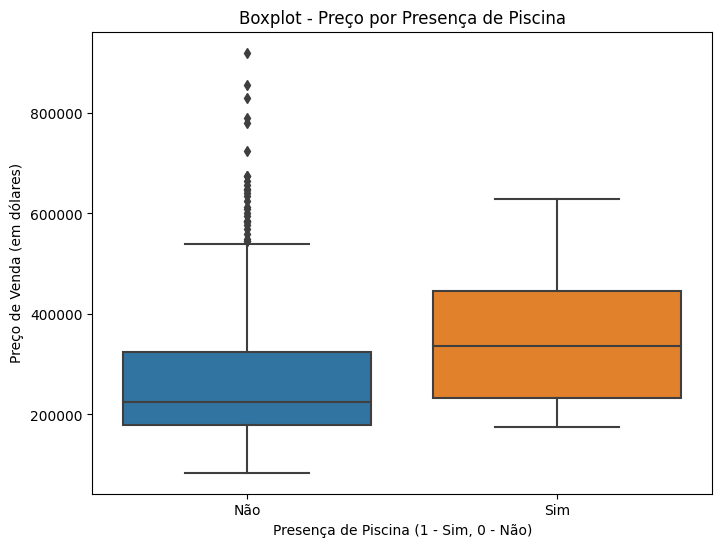

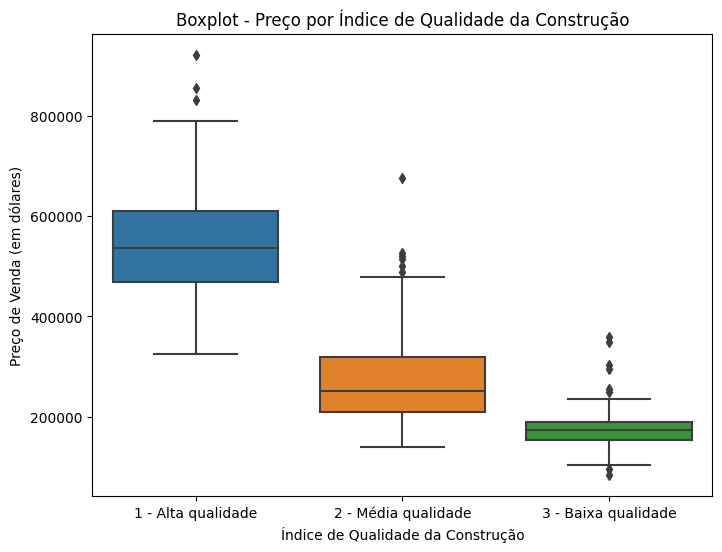

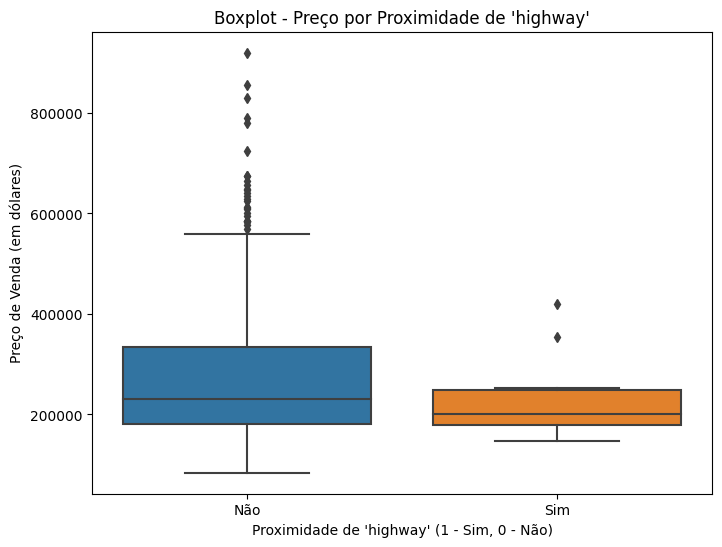

In [108]:
# Boxplot para a variável X5 (Presença de ar condicionado na casa)
plt.figure(figsize=(8, 6))
sns.boxplot(x='X5', y='X1', data=qualitativas)
plt.title("Boxplot - Preço por Presença de Ar Condicionado")
plt.xlabel("Presença de Ar Condicionado (1 - Sim, 0 - Não)")
plt.ylabel("Preço de Venda (em dólares)")
plt.show()

# Boxplot para a variável X7 (Presença ou ausência de piscina)
plt.figure(figsize=(8, 6))
sns.boxplot(x='X7', y='X1', data=qualitativas)
plt.title("Boxplot - Preço por Presença de Piscina")
plt.xlabel("Presença de Piscina (1 - Sim, 0 - Não)")
plt.ylabel("Preço de Venda (em dólares)")
plt.show()

# Boxplot para a variável X9 (Índice de qualidade da construção)
plt.figure(figsize=(8, 6))
sns.boxplot(x='X9', y='X1', data=qualitativas)
plt.title("Boxplot - Preço por Índice de Qualidade da Construção")
plt.xlabel("Índice de Qualidade da Construção")
plt.ylabel("Preço de Venda (em dólares)")
plt.show()

# Boxplot para a variável X11 (Proximidade de 'highway')
plt.figure(figsize=(8, 6))
sns.boxplot(x='X11', y='X1', data=qualitativas)
plt.title("Boxplot - Preço por Proximidade de 'highway'")
plt.xlabel("Proximidade de 'highway' (1 - Sim, 0 - Não)")
plt.ylabel("Preço de Venda (em dólares)")
plt.show()

In [ ]:
# Dicionário com as descrições das variáveis
descricao_variaveis = {
    "ID": "Número de Identificação",
    "X1": "Preço de venda (em dólares)",
    "X2": "Área da casa (em pés quadrados)",
    "X3": "Número de quartos na casa",
    "X4": "Número de banheiros na casa",
    "X5": "Presença de ar condicionado na casa",
    "X6": "Número de carros que podem ser guardados na garagem",
    "X7": "Presença ou ausência de piscina",
    "X8": "Ano de construção da casa",
    "X9": "Índice de qualidade da construção",
    "X10": "Tamanho do terreno (em pés quadrados)",
    "X11": "Proximidade de 'highway'",
    "X12": "Idade da Casa"
}

In [111]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Supondo que você já tenha importado os dados e o DataFrame seja chamado de 'df'
# Se você deu outro nome para o DataFrame, substitua 'df' pelo nome correto.

# Criando a coluna "Idade da Casa"
dfmodelo = df[['X2', 'X3','X4','X5','X6','X7','X9','X10','X11', 'X12']]

# Função para calcular o VIF
def calcular_vif(dataframe):
    vif_data = pd.DataFrame()
    vif_data["Variável"] = dataframe.columns
    vif_data["VIF"] = [variance_inflation_factor(dataframe.values, i) for i in range(dataframe.shape[1])]
    return vif_data

# Selecionando apenas as colunas numéricas para calcular o VIF
colunas_numericas = dfmodelo.select_dtypes(include=['int64', 'float64']).columns
df_numericas = dfmodelo[colunas_numericas]

# Calculando o VIF
vif_resultado = calcular_vif(df_numericas)

print(vif_resultado)

  Variável        VIF
0       X2  29.854216
1       X3  20.864559
2       X4  20.802334
3       X5   6.793989
4       X6  16.227525
5       X7   1.122763
6       X9  18.422609
7      X10   6.103462
8      X11   1.038769
9      X12  19.435274


In [113]:
dfmodelo = df[['X3','X4','X5','X6','X7','X9','X10','X11', 'X12']]

# Função para calcular o VIF
def calcular_vif(dataframe):
    vif_data = pd.DataFrame()
    vif_data["Variável"] = dataframe.columns
    vif_data["VIF"] = [variance_inflation_factor(dataframe.values, i) for i in range(dataframe.shape[1])]
    return vif_data

# Selecionando apenas as colunas numéricas para calcular o VIF
colunas_numericas = dfmodelo.select_dtypes(include=['int64', 'float64']).columns
df_numericas = dfmodelo[colunas_numericas]

# Calculando o VIF
vif_resultado = calcular_vif(df_numericas)

print(vif_resultado)

  Variável        VIF
0       X3  19.226140
1       X4  15.229452
2       X5   6.784266
3       X6  14.103613
4       X7   1.122729
5       X9  17.969823
6      X10   6.092328
7      X11   1.037883
8      X12  18.674338


In [114]:
dfmodelo = df[['X4','X5','X6','X7','X9','X10','X11', 'X12']]

# Função para calcular o VIF
def calcular_vif(dataframe):
    vif_data = pd.DataFrame()
    vif_data["Variável"] = dataframe.columns
    vif_data["VIF"] = [variance_inflation_factor(dataframe.values, i) for i in range(dataframe.shape[1])]
    return vif_data

# Selecionando apenas as colunas numéricas para calcular o VIF
colunas_numericas = dfmodelo.select_dtypes(include=['int64', 'float64']).columns
df_numericas = dfmodelo[colunas_numericas]

# Calculando o VIF
vif_resultado = calcular_vif(df_numericas)

print(vif_resultado)

  Variável        VIF
0       X4  10.229227
1       X5   6.644096
2       X6  13.871971
3       X7   1.122186
4       X9  17.343428
5      X10   6.067524
6      X11   1.037779
7      X12  18.488521


In [115]:
dfmodelo = df[['X4','X5','X6','X7','X10','X11', 'X12']]

# Função para calcular o VIF
def calcular_vif(dataframe):
    vif_data = pd.DataFrame()
    vif_data["Variável"] = dataframe.columns
    vif_data["VIF"] = [variance_inflation_factor(dataframe.values, i) for i in range(dataframe.shape[1])]
    return vif_data

# Selecionando apenas as colunas numéricas para calcular o VIF
colunas_numericas = dfmodelo.select_dtypes(include=['int64', 'float64']).columns
df_numericas = dfmodelo[colunas_numericas]

# Calculando o VIF
vif_resultado = calcular_vif(df_numericas)

print(vif_resultado)

  Variável        VIF
0       X4  10.090270
1       X5   6.482104
2       X6  13.528929
3       X7   1.117253
4      X10   6.049310
5      X11   1.033250
6      X12   5.348788


In [116]:
dfmodelo = df[['X4','X5','X7','X10','X11', 'X12']]

# Função para calcular o VIF
def calcular_vif(dataframe):
    vif_data = pd.DataFrame()
    vif_data["Variável"] = dataframe.columns
    vif_data["VIF"] = [variance_inflation_factor(dataframe.values, i) for i in range(dataframe.shape[1])]
    return vif_data

# Selecionando apenas as colunas numéricas para calcular o VIF
colunas_numericas = dfmodelo.select_dtypes(include=['int64', 'float64']).columns
df_numericas = dfmodelo[colunas_numericas]

# Calculando o VIF
vif_resultado = calcular_vif(df_numericas)

print(vif_resultado)

  Variável       VIF
0       X4  7.278453
1       X5  5.585320
2       X7  1.117249
3      X10  5.760806
4      X11  1.031494
5      X12  5.032732


In [117]:
dfmodelo = df[['X5','X7','X10','X11', 'X12']]

# Função para calcular o VIF
def calcular_vif(dataframe):
    vif_data = pd.DataFrame()
    vif_data["Variável"] = dataframe.columns
    vif_data["VIF"] = [variance_inflation_factor(dataframe.values, i) for i in range(dataframe.shape[1])]
    return vif_data

# Selecionando apenas as colunas numéricas para calcular o VIF
colunas_numericas = dfmodelo.select_dtypes(include=['int64', 'float64']).columns
df_numericas = dfmodelo[colunas_numericas]

# Calculando o VIF
vif_resultado = calcular_vif(df_numericas)

print(vif_resultado)

  Variável       VIF
0       X5  3.442572
1       X7  1.086567
2      X10  4.749240
3      X11  1.030029
4      X12  5.017870


In [118]:
dfmodelo = df[['X5','X7','X10','X11']]

# Função para calcular o VIF
def calcular_vif(dataframe):
    vif_data = pd.DataFrame()
    vif_data["Variável"] = dataframe.columns
    vif_data["VIF"] = [variance_inflation_factor(dataframe.values, i) for i in range(dataframe.shape[1])]
    return vif_data

# Selecionando apenas as colunas numéricas para calcular o VIF
colunas_numericas = dfmodelo.select_dtypes(include=['int64', 'float64']).columns
df_numericas = dfmodelo[colunas_numericas]

# Calculando o VIF
vif_resultado = calcular_vif(df_numericas)

print(vif_resultado)

  Variável       VIF
0       X5  2.915391
1       X7  1.086336
2      X10  2.865812
3      X11  1.029752


In [128]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFECV
from sklearn.metrics import mean_squared_error

# Definindo a variável resposta (y) e as variáveis independentes (X)
y = df['X1']
X = df.drop(columns=['X1', 'Idade da Casa', 'X8', 'ID'])  # Excluindo a coluna ID que não é relevante para a análise

# Divisão da base de dados em conjuntos de treino (70%) e teste (30%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Criando um modelo de regressão linear
modelo = LinearRegression()

# Realizando a seleção de variáveis stepwise usando Recursive Feature Elimination with Cross-Validation (RFECV)
rfecv = RFECV(estimator=modelo, cv=5)
X_train_selected = rfecv.fit_transform(X_train, y_train)

# Obtendo os índices das colunas selecionadas
selected_columns_indices = rfecv.get_support(indices=True)

# Obtendo os nomes das colunas selecionadas
selected_columns_names = X_train.columns[selected_columns_indices]

# Criando um novo DataFrame apenas com as colunas selecionadas pelo método stepwise
X_train_stepwise = X_train[selected_columns_names]
X_test_stepwise = X_test[selected_columns_names]

# Ajustando o modelo usando apenas as variáveis selecionadas pelo método stepwise
modelo.fit(X_train_stepwise, y_train)

# Fazendo previsões usando o conjunto de teste
y_pred = modelo.predict(X_test_stepwise)

# Avaliando o desempenho do modelo
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

# Coeficientes do modelo
print("Coeficientes do modelo:", modelo.coef_)

Mean Squared Error: 5815170908.792591
Coeficientes do modelo: [ 1.00305325e+02 -4.45807620e+03 -1.12795454e+03 -9.55379217e+03
  1.94656378e+04  1.66256471e+04 -4.97727597e+04  1.90816736e+00
 -3.68140161e+04 -1.07767771e+03]


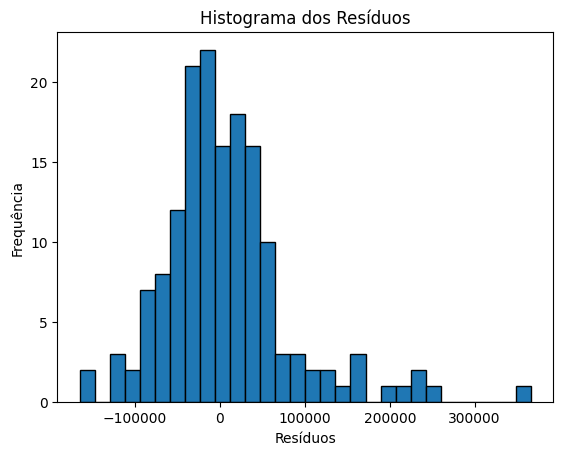

In [129]:
import matplotlib.pyplot as plt

# Calculando os resíduos
residuos = y_test - y_pred

# Plotando o histograma dos resíduos
plt.hist(residuos, bins=30, edgecolor='black')
plt.xlabel('Resíduos')
plt.ylabel('Frequência')
plt.title('Histograma dos Resíduos')
plt.show()

In [122]:
# Coeficientes estimados do modelo
print("Coeficientes estimados do modelo:")
for feature, coef in zip(X_train_stepwise.columns, modelo.coef_):
    print(f"{feature}: {coef}")

# Intercepto do modelo
print("Intercepto do modelo:", modelo.intercept_)

Coeficientes estimados do modelo:
X2: 100.30532479844803
X3: -4458.076203302446
X4: -1127.9545395755868
X5: -9553.79217012863
X6: 19465.63778213135
X7: 16625.64709968591
X9: -49772.75967987592
X10: 1.9081673558657712
X11: -36814.01609999152
X12: -1077.6777107275018
Intercepto do modelo: 156809.4036105681


In [123]:
import statsmodels.api as sm

# Adicionando uma constante para o modelo (necessário para o statsmodels)
X_train_stepwise = sm.add_constant(X_train_stepwise)

# Criando o modelo de regressão linear usando o pacote statsmodels
modelo_statsmodels = sm.OLS(y_train, X_train_stepwise).fit()

# Imprimindo o summary do modelo
print(modelo_statsmodels.summary())

                            OLS Regression Results                            
Dep. Variable:                     X1   R-squared:                       0.779
Model:                            OLS   Adj. R-squared:                  0.773
Method:                 Least Squares   F-statistic:                     124.8
Date:                Sat, 22 Jul 2023   Prob (F-statistic):          1.37e-109
Time:                        20:31:30   Log-Likelihood:                -4541.8
No. Observations:                 365   AIC:                             9106.
Df Residuals:                     354   BIC:                             9148.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1.568e+05   3.62e+04      4.333      0.0

  Variável       VIF
0       X4  7.278453
1       X5  5.585320
2       X7  1.117249
3      X10  5.760806
4      X11  1.031494
5      X12  5.032732

In [124]:
vif_10 = ['X4', 'X5', 'X7', 'X10', 'X11', 'X12']

# Adicionando uma constante para o modelo (necessário para o statsmodels)
X_train_vif10 = X_train_stepwise[['X4', 'X5', 'X7', 'X10', 'X11', 'X12']]

X_train_vif10 = sm.add_constant(X_train_vif10)

# Criando o modelo de regressão linear usando o pacote statsmodels
modelo_statsmodels = sm.OLS(y_train, X_train_vif10).fit()

# Imprimindo o summary do modelo
print(modelo_statsmodels.summary())

                            OLS Regression Results                            
Dep. Variable:                     X1   R-squared:                       0.580
Model:                            OLS   Adj. R-squared:                  0.573
Method:                 Least Squares   F-statistic:                     82.40
Date:                Sat, 22 Jul 2023   Prob (F-statistic):           2.00e-64
Time:                        20:35:06   Log-Likelihood:                -4659.0
No. Observations:                 365   AIC:                             9332.
Df Residuals:                     358   BIC:                             9359.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1.835e+05   3.11e+04      5.906      0.0

In [126]:
vif_5 = ['X5', 'X7', 'X10', 'X11']

# Adicionando uma constante para o modelo (necessário para o statsmodels)
X_train_vif5 = X_train_stepwise[['X5', 'X7', 'X10', 'X11']]

X_train_vif5 = sm.add_constant(X_train_vif5)

# Criando o modelo de regressão linear usando o pacote statsmodels
modelo_statsmodels = sm.OLS(y_train, X_train_vif5).fit()

# Imprimindo o summary do modelo
print(modelo_statsmodels.summary())

                            OLS Regression Results                            
Dep. Variable:                     X1   R-squared:                       0.223
Model:                            OLS   Adj. R-squared:                  0.215
Method:                 Least Squares   F-statistic:                     25.88
Date:                Sat, 22 Jul 2023   Prob (F-statistic):           7.21e-19
Time:                        20:36:11   Log-Likelihood:                -4771.2
No. Observations:                 365   AIC:                             9552.
Df Residuals:                     360   BIC:                             9572.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       8.711e+04      2e+04      4.358      0.0